In [1]:
from pycaret.classification import *

In [2]:
path = '../0-Data/org/'

In [3]:
import os
os.listdir(path)

['train.csv', 'test_x.csv', 'sample_submission.csv']

In [4]:
import pandas as pd
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test_x.csv')
submission = pd.read_csv(path + 'sample_submission.csv')

print(train.shape)
print(test.shape)
print(submission.shape)

(45532, 78)
(11383, 77)
(11383, 2)


In [5]:
train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,4.0,1253,5.0,1094,1.0,1283,5.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,1.0,599,1.0,650,1.0,1429,5.0,1748,1.0,770,5.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,4.0,1301,4.0,1680,4.0,737,1.0,1124,40s,4,1,2,Male,3,1,White,Atheist,1,2,0,4,0,1,3,2,2,4,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1


In [18]:
print("원본 데이터 칼럼 : ", list(train.columns), "\n")

원본 데이터 칼럼 :  ['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'] 



In [26]:
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)
print("get_dummies된 데이터 칼럼 : ", len(train_dummies.columns), '\n',list(train_dummies.columns))
print("get_dummies된 데이터 칼럼 : ", len(test_dummies.columns), '\n', list(test_dummies.columns), )

get_dummies된 데이터 칼럼 :  102 
 ['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE', 'education', 'engnat', 'familysize', 'hand', 'married', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13', 'age_group_+70s', 'age_group_10s', 'age_group_20s', 'age_group_30s', 'age_group_40s', 'age_group_50s', 'age_group_60s', 'gender_Female', 'gender_Male', 'race_Arab', 'race_Asian', 'race_Black', 'race_Indigenous Australian', 'race_Native American', 'race_Other', 'race_White', 'religion_Agnostic', 'religion_Atheist', 'religion_Buddhist', 'religion_Christian_Catholic', 'religion_Chris

* PyCaret에서는 모델 학습 전 실험 환경을 구축 해주어야 합니다. setup 함수를 통해 환경을 구축할 수 있습니다.
* setup 단계에서는 PyCaret이 자동으로 컬럼 형태를 인식합니다. 그 후 사용자에게 제대로 인식되었는지 확인을 받게 됩니다. 그 때 enter를 눌러주시면 됩니다.
* 또한 주어진 데이터의 얼마를 사용하여 train / validation을 구축할지 묻게 되는데, 전체 데이터를 사용하고 싶다면 enter 눌러주시면 됩니다.

In [ ]:
exp_clf102 = setup(data = data, target = 'voted', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['LIMIT_BAL', 'AGE'],
                  group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
                                   ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],
                  log_experiment = True, experiment_name = 'credit1')

In [27]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
clf = setup(data = train_dummies, target = 'voted', train_size=0.9)

,Description,Value
0,session_id,5109
1,Target,voted
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(45532, 102)"
5,Missing Values,False
6,Numeric Features,42
7,Categorical Features,59
8,Ordinal Features,False
9,High Cardinality Features,False


In [71]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6946,0.7664,0.6437,0.7603,0.6971,0.3933,0.3989,0.34
catboost,CatBoost Classifier,0.6956,0.7662,0.6574,0.7537,0.7023,0.3939,0.3978,17.68
gbc,Gradient Boosting Classifier,0.695,0.7653,0.6389,0.764,0.6958,0.3948,0.4013,3.579
lda,Linear Discriminant Analysis,0.6921,0.7615,0.6607,0.7463,0.7009,0.386,0.3891,1.088
et,Extra Trees Classifier,0.6911,0.7607,0.6406,0.7564,0.6937,0.3863,0.3918,2.9
ada,Ada Boost Classifier,0.6901,0.7562,0.6499,0.7494,0.6961,0.3833,0.3874,0.682
rf,Random Forest Classifier,0.6875,0.7549,0.6339,0.7546,0.689,0.3797,0.3856,1.988
xgboost,Extreme Gradient Boosting,0.6783,0.7507,0.6623,0.7249,0.6922,0.3568,0.3584,4.513
dt,Decision Tree Classifier,0.6115,0.6083,0.643,0.6447,0.6438,0.2165,0.2165,0.328
lr,Logistic Regression,0.5457,0.5754,0.996,0.5461,0.7054,0.0001,-0.0004,2.456


# 3. Create Model

In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## 3-1. lightgbm

In [16]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7055,0.7782,0.6443,0.7775,0.7047,0.416,0.4234
1,0.6928,0.7683,0.6353,0.7618,0.6929,0.3905,0.397
2,0.693,0.759,0.6362,0.7616,0.6933,0.391,0.3973
3,0.6891,0.7544,0.6291,0.7596,0.6882,0.3836,0.3904
4,0.7003,0.7753,0.6526,0.7634,0.7037,0.4043,0.4094
5,0.7035,0.7716,0.6589,0.7647,0.7079,0.4103,0.4149
6,0.6913,0.7589,0.6437,0.7541,0.6945,0.3865,0.3914
7,0.6811,0.7501,0.611,0.7571,0.6762,0.369,0.3772
8,0.7008,0.7721,0.6513,0.765,0.7036,0.4054,0.4107
9,0.6973,0.7706,0.6401,0.7663,0.6976,0.3995,0.406


## 3-2. gbc

In [28]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7052,0.7809,0.6536,0.7715,0.7076,0.4145,0.4203
1,0.6942,0.7649,0.6332,0.7664,0.6934,0.3939,0.4011
2,0.7125,0.782,0.6461,0.7893,0.7106,0.4306,0.4392
3,0.6881,0.7569,0.6452,0.749,0.6932,0.3797,0.384
4,0.6881,0.7546,0.6358,0.7545,0.6901,0.3808,0.3865
5,0.6933,0.7638,0.6434,0.7583,0.6962,0.3906,0.396
6,0.6974,0.7658,0.6425,0.7657,0.6987,0.3994,0.4057
7,0.6957,0.7665,0.6399,0.7645,0.6967,0.3962,0.4025
8,0.7017,0.7677,0.6442,0.7718,0.7022,0.4083,0.415
9,0.6737,0.7497,0.6048,0.7492,0.6693,0.3544,0.3623


# Model tuning

## 4-1. tuning catboost

In [23]:
tuned_catb = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6973,0.7685,0.6358,0.7698,0.6964,0.4,0.4073
1,0.6888,0.7582,0.6232,0.7635,0.6863,0.3838,0.3916
2,0.6947,0.7633,0.6221,0.7747,0.69,0.3963,0.4055
3,0.6872,0.7596,0.6186,0.7638,0.6836,0.3809,0.3892
4,0.7032,0.7719,0.6416,0.7762,0.7025,0.4116,0.4191
5,0.7007,0.7714,0.6335,0.7773,0.6981,0.4073,0.4157
6,0.711,0.7755,0.6422,0.7895,0.7083,0.4279,0.4369
7,0.6906,0.766,0.633,0.7605,0.6909,0.3864,0.3929
8,0.6985,0.7664,0.6491,0.7635,0.7016,0.4009,0.4063
9,0.7003,0.7782,0.6399,0.7725,0.7,0.4059,0.4131


In [24]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_catb)

## 4-2. tuning gradient boost classifier

In [28]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6913,0.7597,0.6221,0.7686,0.6876,0.3892,0.3978
1,0.6854,0.7546,0.6043,0.7701,0.6772,0.379,0.3896
2,0.6834,0.7561,0.6077,0.7645,0.6771,0.3744,0.3839
3,0.685,0.7524,0.6094,0.7661,0.6788,0.3775,0.387
4,0.6897,0.7668,0.6232,0.7652,0.6869,0.3856,0.3936
5,0.6934,0.7639,0.6255,0.7702,0.6903,0.3932,0.4016
6,0.7051,0.7679,0.6289,0.7883,0.6997,0.417,0.4273
7,0.6793,0.7574,0.6186,0.7505,0.6782,0.3645,0.3713
8,0.6909,0.7601,0.6335,0.7607,0.6913,0.387,0.3935
9,0.6928,0.7738,0.6278,0.7676,0.6907,0.3916,0.3994


In [30]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.051, loss='deviance', max_depth=2,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.1, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=130,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=828, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# 5. 모델 분석

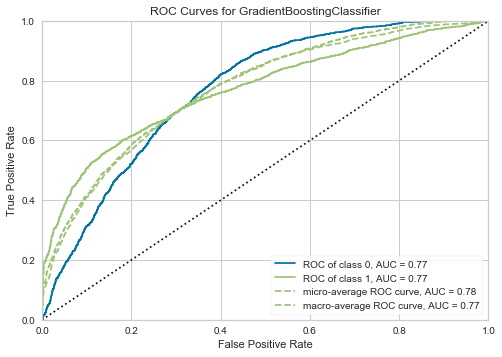

In [39]:
plot_model(gbc, plot = 'auc')

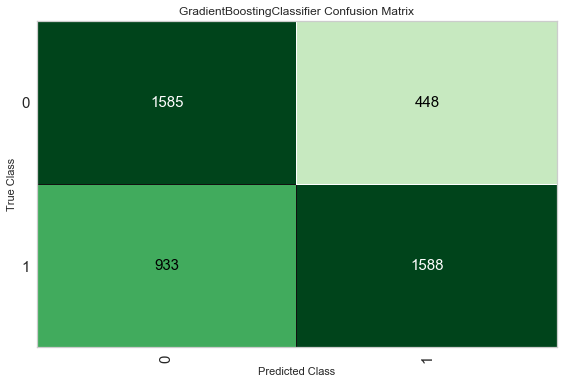

In [40]:
plot_model(gbc, plot = 'confusion_matrix')

# 6. 모델 앙상블 (Model Ensemble)

In [73]:
ensembles = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7008,0.7757,0.6465,0.7688,0.7024,0.4061,0.4123
1,0.7064,0.7719,0.6524,0.7745,0.7082,0.4172,0.4234
2,0.6912,0.762,0.6434,0.7549,0.6947,0.3863,0.3914
3,0.6976,0.7684,0.6442,0.7649,0.6994,0.3997,0.4057
4,0.6899,0.7615,0.6335,0.7588,0.6905,0.3849,0.3912
Mean,0.6972,0.7679,0.644,0.7644,0.6991,0.3988,0.4048
SD,0.0061,0.0055,0.0061,0.007,0.0061,0.0122,0.0124


# 7. 모델 예측 (Prediction)

In [74]:
valid_pred = predict_model(ensembles)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.697,0.77,0.6343,0.7773,0.6986,0.4001,0.4085


In [75]:
print(valid_pred.shape)
valid_pred.head(10)

(4554, 185)


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,religion_Christian_Other_1,religion_Christian_Protestant_1,religion_Hindu_0,religion_Jewish_0,religion_Muslim_1,religion_Other_0,religion_Sikh_0,voted,Label,Score
0,2.0,1145.0,1.0,3032.0,4.0,2263.0,3.0,3261.0,5.0,4065.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2,1,0.6335
1,2.0,749.0,5.0,1330.0,5.0,483.0,2.0,733.0,1.0,920.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,1,0.7076
2,2.0,626.0,3.0,957.0,3.0,833.0,3.0,1133.0,3.0,647.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2,2,0.9787
3,1.0,858.0,1.0,1003.0,2.0,1634.0,1.0,3173.0,5.0,1169.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2,2,0.6308
4,1.0,1005.0,2.0,3198.0,5.0,2042.0,1.0,621.0,1.0,1378.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1,1,0.5469
5,3.0,549.0,3.0,752.0,4.0,633.0,1.0,580.0,1.0,884.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1,2,0.5203
6,4.0,1245.0,1.0,1184.0,4.0,1020.0,2.0,1004.0,1.0,1188.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,2,1,0.7449
7,4.0,748.0,4.0,871.0,4.0,913.0,4.0,692.0,3.0,835.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1,1,0.5210
8,3.0,696.0,5.0,1264.0,5.0,933.0,1.0,915.0,2.0,1263.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2,2,0.7633
9,2.0,5126.0,2.0,1260.0,5.0,479.0,5.0,1394.0,1.0,1012.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2,1,0.6429


## 7-2. 모델 평가 

In [76]:
acc, l_acc = 0, 0
for idx in range(4554):
    if valid_pred.Score[idx]>0.74: pred='2'
    else: pred='1'    

    if valid_pred.voted[idx] == pred:
        acc+=1
        
    if valid_pred.voted[idx] == str(valid_pred.Label[idx]):
        l_acc+=1
        
print(acc/4554)
print(l_acc/4554)

0.6253842775581906
0.696969696969697


# 8. 전체 데이터셋에 학습

In [77]:
final_model = finalize_model(ensembles)

# 8. test set 예측

In [78]:
predictions = predict_model(gbc, data = test_dummies)

In [79]:
predictions.shape

(11383, 103)

In [80]:
predictions.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh,Label,Score
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,...,0,0,1,0,0,0,0,0,2,0.7197
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,...,0,0,0,0,0,0,0,0,2,0.8644
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,...,0,1,0,0,0,0,0,0,1,0.5546
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,...,0,0,0,0,0,0,0,0,1,0.7968
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,...,0,0,0,0,0,0,0,0,2,0.7845


# 제출용 코드

In [81]:
submission['voted'] = predictions['Label']

In [82]:
submission.to_csv('submission_proba.csv', index = False)